<a href="https://colab.research.google.com/github/GeizyCarolina/Python/blob/main/Exercicio_AFDs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercicio Autômato finito determinístico

In [2]:
from graphviz import Digraph
import string

In [3]:
# definindo o AFD
class AFD:
  """
  Classe que representa um 
  autômato finito determinístico
  """

  def __init__(self, alfabeto, estado_inicial, 
               estados_finais, matriz_transicao):
    """
    Construtor
    """

    # atributos da classe
    self.__alfabeto = alfabeto
    self.__estado_inicial = estado_inicial
    self.__estados_finais = estados_finais
    self.__matriz_transicao = matriz_transicao

  def reconhecer(self, palavra):
    print(f"Estado inicial={estado_inicial}")
    print('------------------------------')

    # o primeiro estado é o estado inicial
    estado_atual = estado_inicial

    for c in palavra:

      # verificando se este símbolo faz
      # parte do nosso alfabeto
      if c not in self.__alfabeto:
        raise Exception(f"{c} não pertence ao alfabeto")

      # verificando se o estado atual tem saída
      # para este evento 
      if c not in self.__matriz_transicao[estado_atual]:
        raise Exception(f"O estado {estado_atual} não tem saída para o evento {c}")

      # agora posso realizar a transição de estados
      print(f'Estado atual={estado_atual}')
      print(f'Evento={c}')
      # realiza a transição de fato!
      estado_atual = self.__matriz_transicao[estado_atual][c]
      print(f'Próximo estado={estado_atual}')
      print('------------------------------')


    # Se o estado atual estiver no conjunto
    # de estados iniciais:
    #     então: reconhece
    # caso contrário:
    #     não reconhece
    return estado_atual in self.__estados_finais

  def desenhar(self):
    g = Digraph('AFD')
    g.node('start', shape='plaintext')

    # responsável por desenhar os estados do AFD
    for estado in self.__matriz_transicao.keys():
      if estado in self.__estados_finais:
        g.node(estado, shape='doublecircle') # um dos estados finais
      else:
        g.node(estado) # um estados comum

    # responsável por desenhar as transições (os eventos)
    for estado_origem in self.__matriz_transicao.keys():

      # desenhando o primeiro evento
      # evento que leva ao estado inicial
      if estado_origem == self.__estado_inicial:
        g.edge('start', estado_origem)  

      eventos = self.__matriz_transicao[estado_origem].keys()
      for ev in eventos:
        # recupera o estado destino dado o estado origem e o evento
        estado_destino = self.__matriz_transicao[estado_origem][ev]
        # desenha as arestas com os eventos
        g.edge(estado_origem, estado_destino, ev)
    
    return g

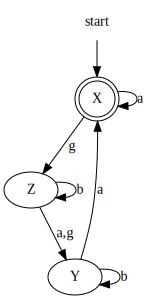

In [10]:
# instanciando o AFD
alfabeto = ["a", "b", "g"]
estado_inicial = "X"
estados_finais = ["X"]
matriz_transicao = {
    "X":{
        "a": "X",
        "g": "Z"
    },
    "Z": {
        "a,g": "Y",
        "b": "Z"
    },
     "Y": {
        "a": "X",
        "b": "Y",
    }
}
afd = AFD(alfabeto, estado_inicial, estados_finais, matriz_transicao)
afd.desenhar()

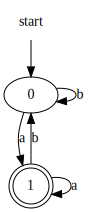

In [13]:
# instanciando o AFD
alfabeto = ["a", "b"]
estado_inicial = "0"
estados_finais = ["1"]
matriz_transicao = {
    "0":{
        "b": "0",
        "a": "1"
    },
    "1": {
        "b": "0",
        "a": "1"
    }
}
afd = AFD(alfabeto, estado_inicial, estados_finais, matriz_transicao)
afd.desenhar()